In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.inter_rater import fleiss_kappa

In [4]:
# reading data
import zipfile
with zipfile.ZipFile('news_grp1.zip', 'r') as zip_ref:
    zip_ref.extractall('news_grp1.csv')
    
results = pd.read_csv('news_grp1.csv/news_grp1/news_grp1.csv')
results

,title,text,category,keywords,source_name,data,tag,user_id,username,dataset_id
0,\t\t\t\tدوره تربیتی برنا برگزار خواهد شد \t\t\t,NaN,مذهبی,NaN,رسا,53691,غیر مهم,2,moein,4
1,رانندگی با مرکب مرگ!,NaN,اجتماعی,NaN,روزنامه جوان آنلاین,3129482,غیر مهم,2,moein,4
2,پیاده روی دانشگاهیان سمنان با شعار «دانشگاه دو...,NaN,ورزشی,NaN,آنا,3690945,غیر مهم,2,moein,4
3,\n بهم رسانی ۱۷ هزار میلیاردی شرکت ها...,\n\n\n\n\n,اقتصادی,NaN,شما نیوز,80125,غیر مهم,2,moein,4
4,کلاهبرداری ۳۵۰ میلیارد ریالی از صنف زرگران ساری,NaN,حوادث,NaN,باشگاه خبرنگاران,14781,غیر مهم,2,moein,4
...,...,...,...,...,...,...,...,...,...,...
7995,درگیری شدید شبه نظامیان امارات و عربستان در اس...,به گزارش گروه بین الملل خبرگزاری تسنیم به نقل ...,بین الملل,NaN,خبرگزاری تسنیم,2263257,غیر مهم,11,a.lagziyan,2
7996,امام خمینی (ره) بیش از ایران در جهان موثر بود...,به گزارش خبرنگار خبرگزاری شبستان از شیراز، اند...,فرهنگ و هنر,NaN,شبستان,1967520,غیر مهم,11,a.lagziyan,2
7997,مادری که رهبر انقلاب برایش دعا کردند کیست؟/ قر...,گروه خانواده؛ نعیمه موحد: دیدار دانشجویی امسال...,فرهنگ و هنر,"حضرت آیت الله خامنه ای,جنبش دانشجویی,خبر خوب,...",خبرگزاری فارس,1748716,غیر مهم,11,a.lagziyan,2
7998,\t\t \t\t\tلحظه دلهره آور نجات سگی که در یخبن...,به گزارش خبرنگار حوزه اخبار داغ گروه فضای مجاز...,فناوری و ارتباطات,نجات سگ \t\t\t\t\t، \t\t\...,باشگاه خبرنگاران,61151,غیر مهم,11,a.lagziyan,2


In [3]:
# get all rataers
np.unique(results.username)

array(['a.lagziyan', 'h.hamidi', 'h.hemmatiyan', 'moein'], dtype=object)

In [4]:
# get all of first group of raters' news
usernames_1 = ['a.lagziyan', 'h.hamidi']
df_1 = results.loc[results['username'].isin(usernames_1)]
data = df_1['data']
sorted_df_1 = df_1[data.isin(data[data.duplicated()])].sort_values("data")

In [5]:
# get all of second group of raters' news
usernames_2 = ['moein', 'h.hemmatiyan']
df_2 = results.loc[results['username'].isin(usernames_2)]
data = df_2['data']
sorted_df_2 = df_2[data.isin(data[data.duplicated()])].sort_values("data")

In [7]:
interested_pair = []
last_row_data = 0
last_row_tag = ''
last_row = ''
for index, row in sorted_df_1.iterrows():
    if row.data == last_row_data and row.tag != last_row_tag:
        interested_pair.append(row)
    last_row_data = row.data
    last_row_tag = row.tag
    last_row = row

# compute agreement

In [6]:
# a function to compute agreement between a tow raters
def compute_agreement_matrix(sorted_df):
    total_agreement = [[0, 0],[0, 0]]
    agreement_matrix = []
    last_row_data = 0
    last_row_tag = ''
    last_row = ''
    for index, row in sorted_df.iterrows():
        if row.data == last_row_data:
            if row.tag == 'مهم' and last_row_tag == 'مهم':
                total_agreement[0][0] += 1
                agreement_matrix.append([2,0])
            elif row.tag == 'غیر مهم' and last_row_tag == 'غیر مهم':
                total_agreement[1][1] += 1
                agreement_matrix.append([0,2])
            # hasan not important, arash important
            elif row.tag == 'غیر مهم' and last_row_tag == 'مهم':
                total_agreement[0][1] += 1
                agreement_matrix.append([1,1])
            # hasan important, arash not important
            elif row.tag == 'مهم' and last_row_tag == 'غیر مهم':
                total_agreement[1][0] += 1
                agreement_matrix.append([1,1])

        last_row_data = row.data
        last_row_tag = row.tag
        last_row = row
    return agreement_matrix ,total_agreement

In [7]:
# a function which computes kappa agreement
def kappa_agreement(agreement_mat):
    agreement_mat = np.array(agreement_mat)
    AG = (agreement_mat[0][0] + agreement_mat[1][1]) / np.sum(agreement_mat)
    AC = (agreement_mat[0][1] / agreement_mat[1][1]) * (agreement_mat[1][0] / agreement_mat[1][1])
    K = (AG - AC) / (1 - AC)
    return np.around(K, decimals=4)

In [8]:
agreement_matrix_1, total_agreement_1 = compute_agreement_matrix(sorted_df_1.sort_values(by=["data", "username"]))
agreement_matrix_2, total_agreement_2 = compute_agreement_matrix(sorted_df_2.sort_values(by=["data", "username"]))

In [9]:
kappa_arash_hassan = kappa_agreement(agreement_mat=total_agreement_1)
kappa_moein_hamed = kappa_agreement(agreement_mat=total_agreement_2)

In [10]:
# confusion agreement matrix of first group
np.array(total_agreement_1)

array([[  50,  182],
       [ 142, 1626]])

In [11]:
# confusion agreement matrix of second group
np.array(total_agreement_2)

array([[ 230,  243],
       [ 410, 1117]])

In [12]:
agreement_matrix_total = agreement_matrix_1 + agreement_matrix_2

In [13]:
arash_p = total_agreement_1[0][0] + total_agreement_1[0][1]
arash_n = total_agreement_1[1][0] + total_agreement_1[1][1]

hasan_p = total_agreement_1[0][0] + total_agreement_1[1][0]
hasan_n = total_agreement_1[0][1] + total_agreement_1[1][1]

hamed_p = total_agreement_2[0][0] + total_agreement_2[0][1]
hamed_n = total_agreement_2[1][0] + total_agreement_2[1][1]

moein_p = total_agreement_2[0][0] + total_agreement_2[1][0]
moein_n = total_agreement_2[0][1] + total_agreement_2[1][1]

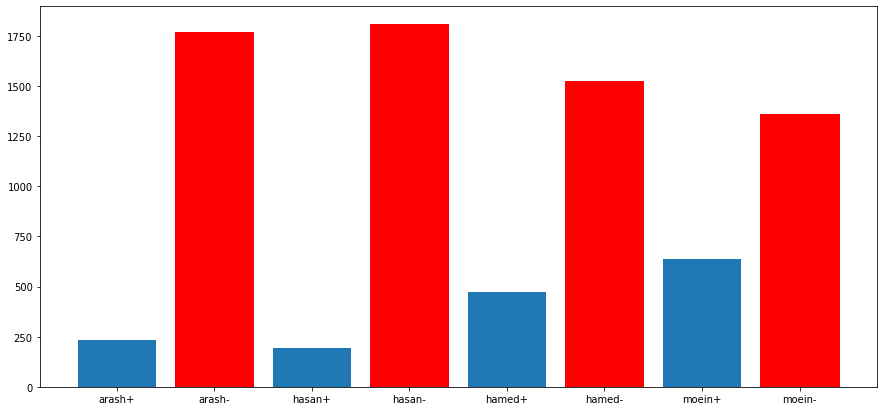

In [14]:
plt.figure(figsize=(15,7))
barlist = plt.bar(['arash+','arash-','hasan+','hasan-','hamed+','hamed-','moein+','moein-'] \
        ,[arash_p,arash_n,hasan_p,hasan_n,hamed_p,hamed_n,moein_p,moein_n])
barlist[1].set_color('r')
barlist[3].set_color('r')
barlist[5].set_color('r')
barlist[7].set_color('r')
plt.savefig('p_n.jpg', dpi=300)

# Compute Fleiss Kappa Agreement For each class & Total

In [18]:
# compute kappa score for each category of news
def compute_category_kappa(sorted_df):
    categories = list(np.unique(sorted_df['category'].values))
    splited_categories = {}
    categories_kappa = {}
    all_agreements = {}
    for category in categories:
        splited_categories[category] = sorted_df.loc[results['category'] == category]
    for category in categories:
        df = splited_categories[category]
        cat_agreement, total_agreement = compute_agreement_matrix(df.sort_values(by=["data", "username"]))
        all_agreements[category] = cat_agreement
        kappa = kappa_agreement(agreement_mat=total_agreement)
        categories_kappa[category] = kappa
    return categories_kappa, all_agreements

In [19]:
kappa_cat_arash_hassan, all_agreements_1 = compute_category_kappa(sorted_df_1)
kappa_cat_moein_hamed, all_agreements_2 = compute_category_kappa(sorted_df_2)

In [20]:
print('Fleiss Kappa Cat')
for cat in list(all_agreements_1.keys()):
    all_agreements_cat = all_agreements_1[cat] + all_agreements_2[cat]
    print(cat, fleiss_kappa(all_agreements_cat))

Fleiss Kappa Cat
اجتماعی 0.2577851483324123
اقتصادی 0.119415600096595
بین الملل 0.10695934148166644
حوادث 0.2101690731827718
سیاسی 0.22981750695948036
علمی و پزشکی 0.21978404737025414
فرهنگ و هنر 0.19251119251119214
فناوری و ارتباطات 0.14105599148822973
مذهبی 0.07848837209302326
ورزشی 0.22874166548446548


In [21]:
fleiss_kappa(agreement_matrix_total)

0.2131779406744623

# Compute Kappa Agreement For each class & Total

In [22]:
category = ['social','economics','international','incidents','politics','science','art','tech','religious','sports']

In [23]:
kappa_cat_arash_hassan, _ = compute_category_kappa(sorted_df_1)

In [24]:
'Kappa',kappa_cat_arash_hassan, kappa_arash_hassan

('Kappa',
 {'اجتماعی': 0.8623,
  'اقتصادی': 0.6929,
  'بین الملل': 0.7759,
  'حوادث': 0.942,
  'سیاسی': 0.7999,
  'علمی و پزشکی': 0.759,
  'فرهنگ و هنر': 0.9762,
  'فناوری و ارتباطات': 0.8049,
  'مذهبی': 0.9697,
  'ورزشی': 0.846},
 0.8364)

In [25]:
kappa_cat_moein_hamed, _ = compute_category_kappa(sorted_df_2)

In [26]:
'Kappa',kappa_cat_moein_hamed, kappa_moein_hamed

('Kappa',
 {'اجتماعی': 0.8281,
  'اقتصادی': 0.63,
  'بین الملل': -0.1027,
  'حوادث': 0.6229,
  'سیاسی': 0.7114,
  'علمی و پزشکی': 0.5102,
  'فرهنگ و هنر': 0.8316,
  'فناوری و ارتباطات': 0.5392,
  'مذهبی': 0.8475,
  'ورزشی': 0.6395},
 0.6452)

## Kappa agreement on bar plot

findfont: Font family ['BNasanin'] not found. Falling back to DejaVu Sans.


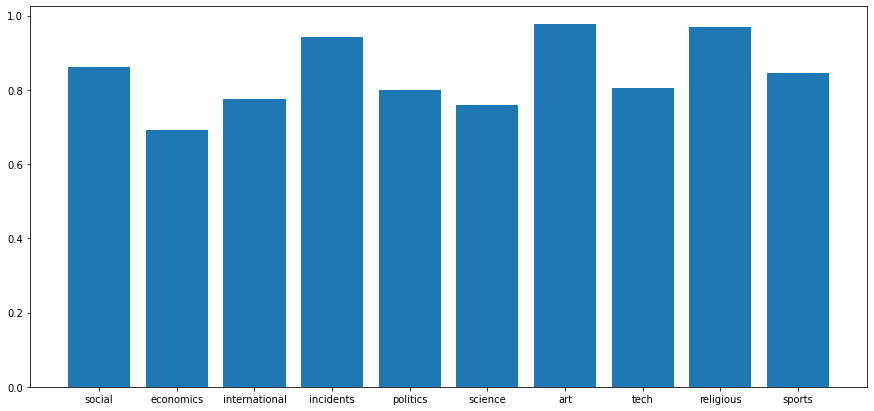

<Figure size 432x288 with 0 Axes>

In [27]:
# arash and hasan categorial kappa agreement
plt.figure(figsize=(15,7))
plt.rcParams["font.family"] = "BNasanin"
plt.bar(category,list(kappa_cat_arash_hassan.values()))
plt.show()
plt.savefig('a_h.png', dpi=300)

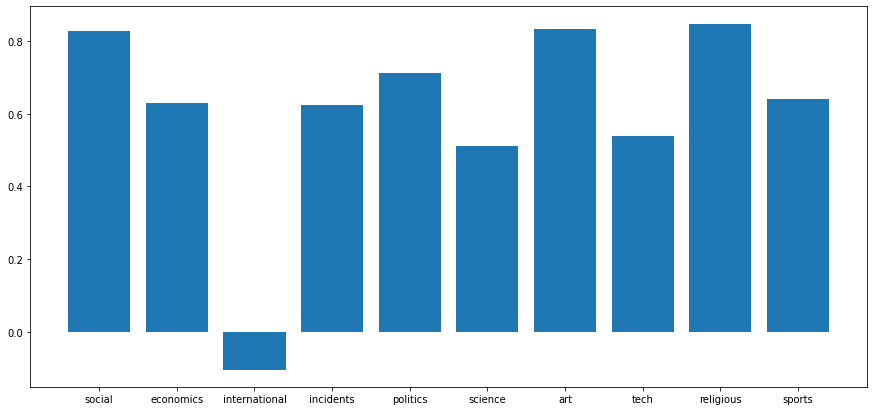

<Figure size 432x288 with 0 Axes>

In [28]:
# hamed and moein categorial kappa agreement
plt.figure(figsize=(15,7))
plt.rcParams["font.family"] = "BNasanin"
plt.bar(category,list(kappa_cat_moein_hamed.values()))
plt.show()
plt.savefig('m_h.jpg', dpi=300)